In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('iris dataset.csv')
data.dropna()
data.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,Class Labels
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.columns.values

array(['sepal length in cm', 'sepal width in cm', 'petal length in cm',
       'petal width in cm', 'Class Labels'], dtype=object)

In [4]:
number_class = data['Class Labels'].value_counts()
number_of_classes = len(number_class)
number_of_classes

3

In [5]:
data['Class Labels'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Class Labels, dtype: int64

In [6]:
encode_class_labels = {"Class Labels":     {"Iris-setosa": 1, "Iris-virginica": 2, "Iris-versicolor": 3}}
data.replace(encode_class_labels, inplace=True)

In [7]:
pd.options.display.max_rows = 999
data

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,Class Labels
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1


In [8]:
X = data[['sepal length in cm','sepal width in cm','petal length in cm','petal width in cm']].values
y = data['Class Labels'].values

### Find Mean Vectors


In [9]:
cols = len(X[0])
rows = len(X)

In [16]:
mean_vectors = []
for cl in range(1,number_of_classes+1):
    mean_vectors.append(np.mean(X[y==cl], axis=0))
    print('Mean Vector class %s: %s\n' %(cl, mean_vectors[cl-1]))

Mean Vector class 1: [5.006 3.418 1.464 0.244]

Mean Vector class 2: [6.588 2.974 5.552 2.026]

Mean Vector class 3: [5.936 2.77  4.26  1.326]



### Scatter Matrix within 

In [17]:
S_W = np.zeros((cols,cols))
for cl,mv in zip(range(1,cols), mean_vectors):
    class_sc_mat = np.zeros((cols,cols))                       # scatter matrix for every class
    for row in X[y == cl]:
        row, mv = row.reshape(cols,1), mv.reshape(cols,1)      # make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)
    S_W += class_sc_mat                                        # sum class scatter matrices
print('within-class Scatter Matrix:\n', S_W)

within-class Scatter Matrix:
 [[38.9562 13.683  24.614   5.6556]
 [13.683  17.035   8.12    4.9132]
 [24.614   8.12   27.22    6.2536]
 [ 5.6556  4.9132  6.2536  6.1756]]


### Scatter Matrix Between

In [18]:
overall_mean = np.mean(X, axis=0)

S_B = np.zeros((cols,cols))
for i,mean_vec in enumerate(mean_vectors):  
    n = X[y==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(cols,1)                                       # make column vector
    overall_mean = overall_mean.reshape(cols,1)                               # make column vector
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

print('between-class Scatter Matrix:\n', S_B)

between-class Scatter Matrix:
 [[ 63.21213333 -19.534      165.16466667  71.36306667]
 [-19.534       10.9776     -56.0552     -22.4924    ]
 [165.16466667 -56.0552     436.64373333 186.90813333]
 [ 71.36306667 -22.4924     186.90813333  80.60413333]]


### Eigen vector and eigen value pairs

In [19]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(cols,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))


Eigenvector 1: 
[[ 0.20490976]
 [ 0.38714331]
 [-0.54648218]
 [-0.71378517]]
Eigenvalue 1: 3.23e+01

Eigenvector 2: 
[[-0.00898234]
 [-0.58899857]
 [ 0.25428655]
 [-0.76703217]]
Eigenvalue 2: 2.78e-01

Eigenvector 3: 
[[-0.70356601]
 [ 0.02882257]
 [-0.03376478]
 [ 0.7092419 ]]
Eigenvalue 3: -1.99e-15

Eigenvector 4: 
[[-0.00569894]
 [-0.33541958]
 [-0.4049902 ]
 [ 0.85055521]]
Eigenvalue 4: 5.25e-15


### Sorting in decreasing order and picking top k values, max = c-1

In [20]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])

# see the most informative eigen pair by using percentage

print('\nVariance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))



Eigenvalues in decreasing order:

32.27195779972983
0.2775668638400468
5.252146688000241e-15
1.986083383708606e-15

Variance explained:

eigenvalue 1: 99.15%
eigenvalue 2: 0.85%
eigenvalue 3: 0.00%
eigenvalue 4: 0.00%


### Selecting Linear Discriminants

In [21]:
W = np.hstack((eig_pairs[0][1].reshape(cols,1), eig_pairs[1][1].reshape(cols,1)))
print('Matrix W:\n', W.real)

Matrix W:
 [[ 0.20490976 -0.00898234]
 [ 0.38714331 -0.58899857]
 [-0.54648218  0.25428655]
 [-0.71378517 -0.76703217]]


### Transforming to new space

In [22]:
X_lda = X.dot(W)
assert X_lda.shape == (rows,2), "The matrix is not 150x2 dimensional."

### Plotting

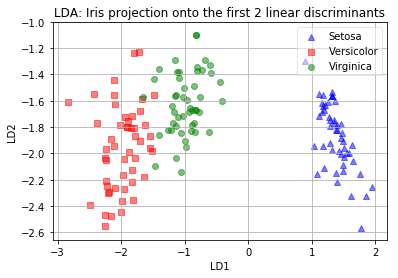

In [23]:
label_dict = {1: 'Setosa', 2: 'Versicolor', 3:'Virginica'}

def plot_step_lda():

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X_lda[:,0].real[y == label],
                y=X_lda[:,1].real[y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Iris projection onto the first 2 linear discriminants')

   
    plt.grid()
    plt.tight_layout
    plt.show()

plot_step_lda()